In [7]:
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Imported train-test split
from sklearn.model_selection import train_test_split
# Imported scaler(Saw that its important for KNN)
from sklearn.preprocessing import StandardScaler
# Imported KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix #for evaluation
from imblearn.over_sampling import SMOTE #used this to handle class imbalance

In [8]:
df = pd.read_csv("/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
df.shape

(30000, 25)

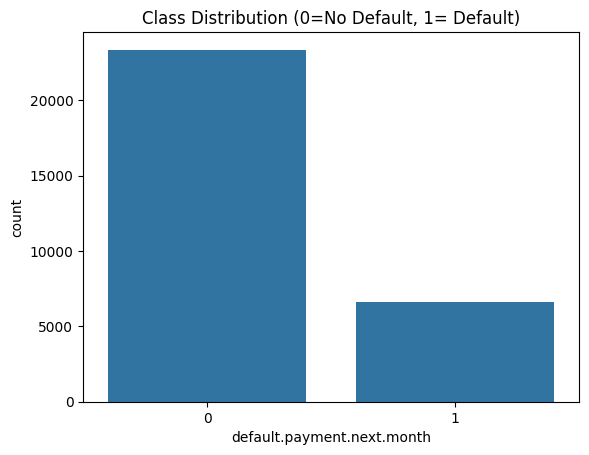

In [11]:
sns.countplot(x="default.payment.next.month", data=df)
plt.title("Class Distribution (0=No Default, 1= Default)")
plt.show()

In [12]:
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

In [13]:
# Here I Splitted data into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(
    X,y, test_size=0.2, random_state=42,stratify=y
)

In [14]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # Fit scaler on training data and transform
X_test_scaled = scaler.transform(X_test) # And this transforms test data using same scaler

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train) #Here I Trained KNN on imbalanced data

y_pred = knn.predict(X_test_scaled) #This Predict on test data..

Accuracy: 0.7935
precision: 0.553012048192771
Recall: 0.3458929917106255


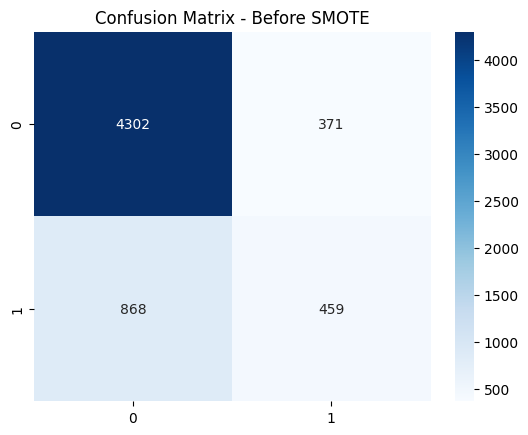

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

#Did the above lined to measure accuracy,precision and recall before smote.

cm = confusion_matrix(y_test,y_pred) #This shows missed defaults.
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Before SMOTE")
plt.show()

In [17]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled,y_train) #Did this to up sample the minority classes while avoiding overfitting.

In [18]:
# Here I trained KNN again on SMOTE data

knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote,y_train_smote)

y_pred_smote = knn_smote.predict(X_test_scaled)

Accuracy: 0.6556666666666666
Precision: 0.3433658329800763
Recall: 0.6103993971363979


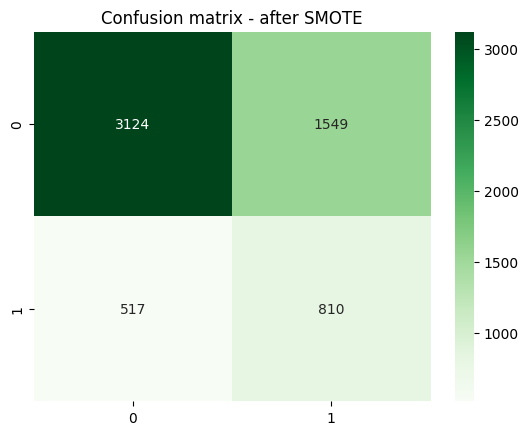

In [19]:
print("Accuracy:", accuracy_score(y_test,y_pred_smote))
print("Precision:",precision_score(y_test,y_pred_smote))
print("Recall:",recall_score(y_test,y_pred_smote))

#Checked the measures of Accuracy,precision and recall after appliying smote..

cm_smote= confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote,annot=True, fmt="d",cmap="Greens")
plt.title("Confusion matrix - after SMOTE")
plt.show()

In [20]:
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Before SMOTE": [
        accuracy_score(y_test,y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)
    ],
    "After SMOTE": [
        accuracy_score(y_test,y_pred_smote),
        precision_score(y_test , y_pred_smote),
        recall_score(y_test,y_pred_smote)
    ]
})

comparison

#The result shows the improve in recall..

,Metric,Before SMOTE,After SMOTE
0,Accuracy,0.793500,0.655667
1,Precision,0.553012,0.343366
2,Recall,0.345893,0.610399
